### Downloading the train and test dataset

In [ ]:
 from pathlib import Path
data_path = Path("data/")


#setup directory
if data_path.is_dir():
  print(f"{data_path} directory already exists...")
else:
  print(f"{data_path} does not exists...creating one")
  data_path.mkdir(parents = True, exist_ok = True)

data does not exists...creating one


In [ ]:
import requests

#setup path
train_data = data_path/'train.csv'
test_data = data_path/'test.csv'


# download if not already exist
if not train_data.is_file():
  with open(train_data, 'wb') as f:
    request = requests.get("https://raw.githubusercontent.com/aashu-0/ml-notebooks/refs/heads/main/autism-prediction/train.csv")
    print(f'Downloading {train_data}...')
    f.write(request.content)
else:
  print(f'{train_data} already exists')

if not test_data.is_file():
  with open(test_data, 'wb') as f:
    request = requests.get("https://raw.githubusercontent.com/aashu-0/ml-notebooks/refs/heads/main/autism-prediction/test.csv")
    print(f'Downloading {test_data}...')
    f.write(request.content)
else:
  print(f'{test_data} already exists')

### Data Loading and visualization

[*Dataset Source*](https://www.kaggle.com/competitions/autism-prediction/data)

In [ ]:
import pandas as pd

train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [ ]:
# train and test dataset shapes
print(f"The shape of the training set: {train_df.shape}")
print(f"The shape of the testing set: {test_df.shape}")

The shape of the training set: (800, 22)
The shape of the testing set: (200, 21)


In [ ]:
test_df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
A1_Score,0,1,1,1,1
A2_Score,0,0,0,1,0
A3_Score,0,0,0,1,0
A4_Score,0,0,1,0,1
A5_Score,0,1,0,1,1
A6_Score,0,0,1,0,0
A7_Score,0,0,0,1,0
A8_Score,1,0,1,0,1
A9_Score,0,0,0,1,1


In [ ]:
train_df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
A1_Score,1,0,1,0,0
A2_Score,0,0,1,0,0
A3_Score,1,0,1,0,0
A4_Score,1,0,1,1,0
A5_Score,1,0,1,0,1
A6_Score,1,0,1,0,0
A7_Score,0,0,0,0,0
A8_Score,1,0,0,0,0
A9_Score,1,0,1,0,1


**Autism Quotient Score** -> a measure of the expression of autistic traits in adults.

In this dataset AQ-10 is used as measure to Autism
[more info](https://www.autismresearchcentre.com/content/uploads/2024/11/AQ10.pdf)

Target Column -> `Class/ASD`

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
train_df['age_desc'].unique()

array(['18 and more'], dtype=object)

In [ ]:
# drop ID, age_desc, result
train_df = train_df.drop(columns=["ID", "age_desc", "result"])

In [ ]:
# age -> float to int
train_df['age'] = train_df['age'].astype('int')
train_df['age'].dtype

dtype('int64')

In [ ]:
train_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# unique values in columns

for col in train_df.columns:
  column = ["age","result"]
  if col not in column:
    print(f'{col}\n {train_df[col].unique()}')

A1_Score
 [1 0]
A2_Score
 [0 1]
A3_Score
 [1 0]
A4_Score
 [1 0]
A5_Score
 [1 0]
A6_Score
 [1 0]
A7_Score
 [0 1]
A8_Score
 [1 0]
A9_Score
 [1 0]
A10_Score
 [1 0]
gender
 ['f' 'm']
ethnicity
 ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']
jaundice
 ['no' 'yes']
austim
 ['no' 'yes']
contry_of_res
 ['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leone' 'Argentina' 'Azerbaijan' 'Iceland'
 'Egypt' 'Serbia' 'Afghanistan' 'Costa Rica' 'Jordan' 'Angola' 'Pakistan'
 'Brazil' 'Ireland' 'Kazakhstan' 'Viet Nam' 'Ethiopia' 'Austria' 'Finland'
 'France' 'Malaysia' 'Japan' 'Spain' 'Philippines' 'Iran' 'Czech Republic'
 'Russia' 'Romania' 'Mexico' 'Belgium' 'Aruba' 'Uruguay' 'Indonesia'
 'Ukraine' 'AmericanSamoa' 'Germany' 'China' 'Iraq' 'Tonga' 'South Africa'
 'Saudi Arabia' 'Hong Kong' 'Bahamas' 'Ecuad

In [ ]:
# replacing names in contry_of_res column
dict = {'Viet Nam': 'Vietnam',
        'Hong Kong': 'China',
        'AmericanSamoa': 'United States'}

train_df['contry_of_res'] = train_df['contry_of_res'].replace(dict)
train_df['contry_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Vietnam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'Germany', 'China', 'Iraq', 'Tonga', 'South Africa',
       'Saudi Arabia', 'Bahamas', 'Ecuador', 'Cyprus', 'Bangladesh',
       'Oman', 'Bolivia', 'Sweden', 'Niger'], dtype=object)

In [ ]:
# target class
train_df['Class/ASD'].value_counts()

,count
Class/ASD,
0,615
1,185


Conclusions:

1. convert `age` from float to int.
2. drop `ID`
3. drop `age_desc` as all are adults (18 or more)
4. class imbalance in `Class/AD` -> sampling is to be done

In [ ]:
train_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# categorical and numerical columns

categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
                       'A5_Score', 'A6_Score','A7_Score', 'A8_Score',
                       'A9_Score', 'A10_Score', 'gender','ethnicity',
                       'jaundice', 'austim', 'contry_of_res',
                       'used_app_before', 'relation']
numerical_columns = ['age']

In [ ]:
train_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,Class/ASD
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.11500,0.231250
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.88611,0.421896
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.00000,0.000000
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.00000,0.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.00000,0.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.00000,1.000000


In [ ]:
train_df.describe(include=['O'])

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
count,800,800,800,800,800,800,800
unique,2,12,2,2,59,2,6
top,f,White-European,no,no,United States,no,Self
freq,415,211,604,683,150,765,617


Exploratory Data Analysis (EDA)
1. Univariate analysis
2. BiVariate analysis

#### Univariate Analysis

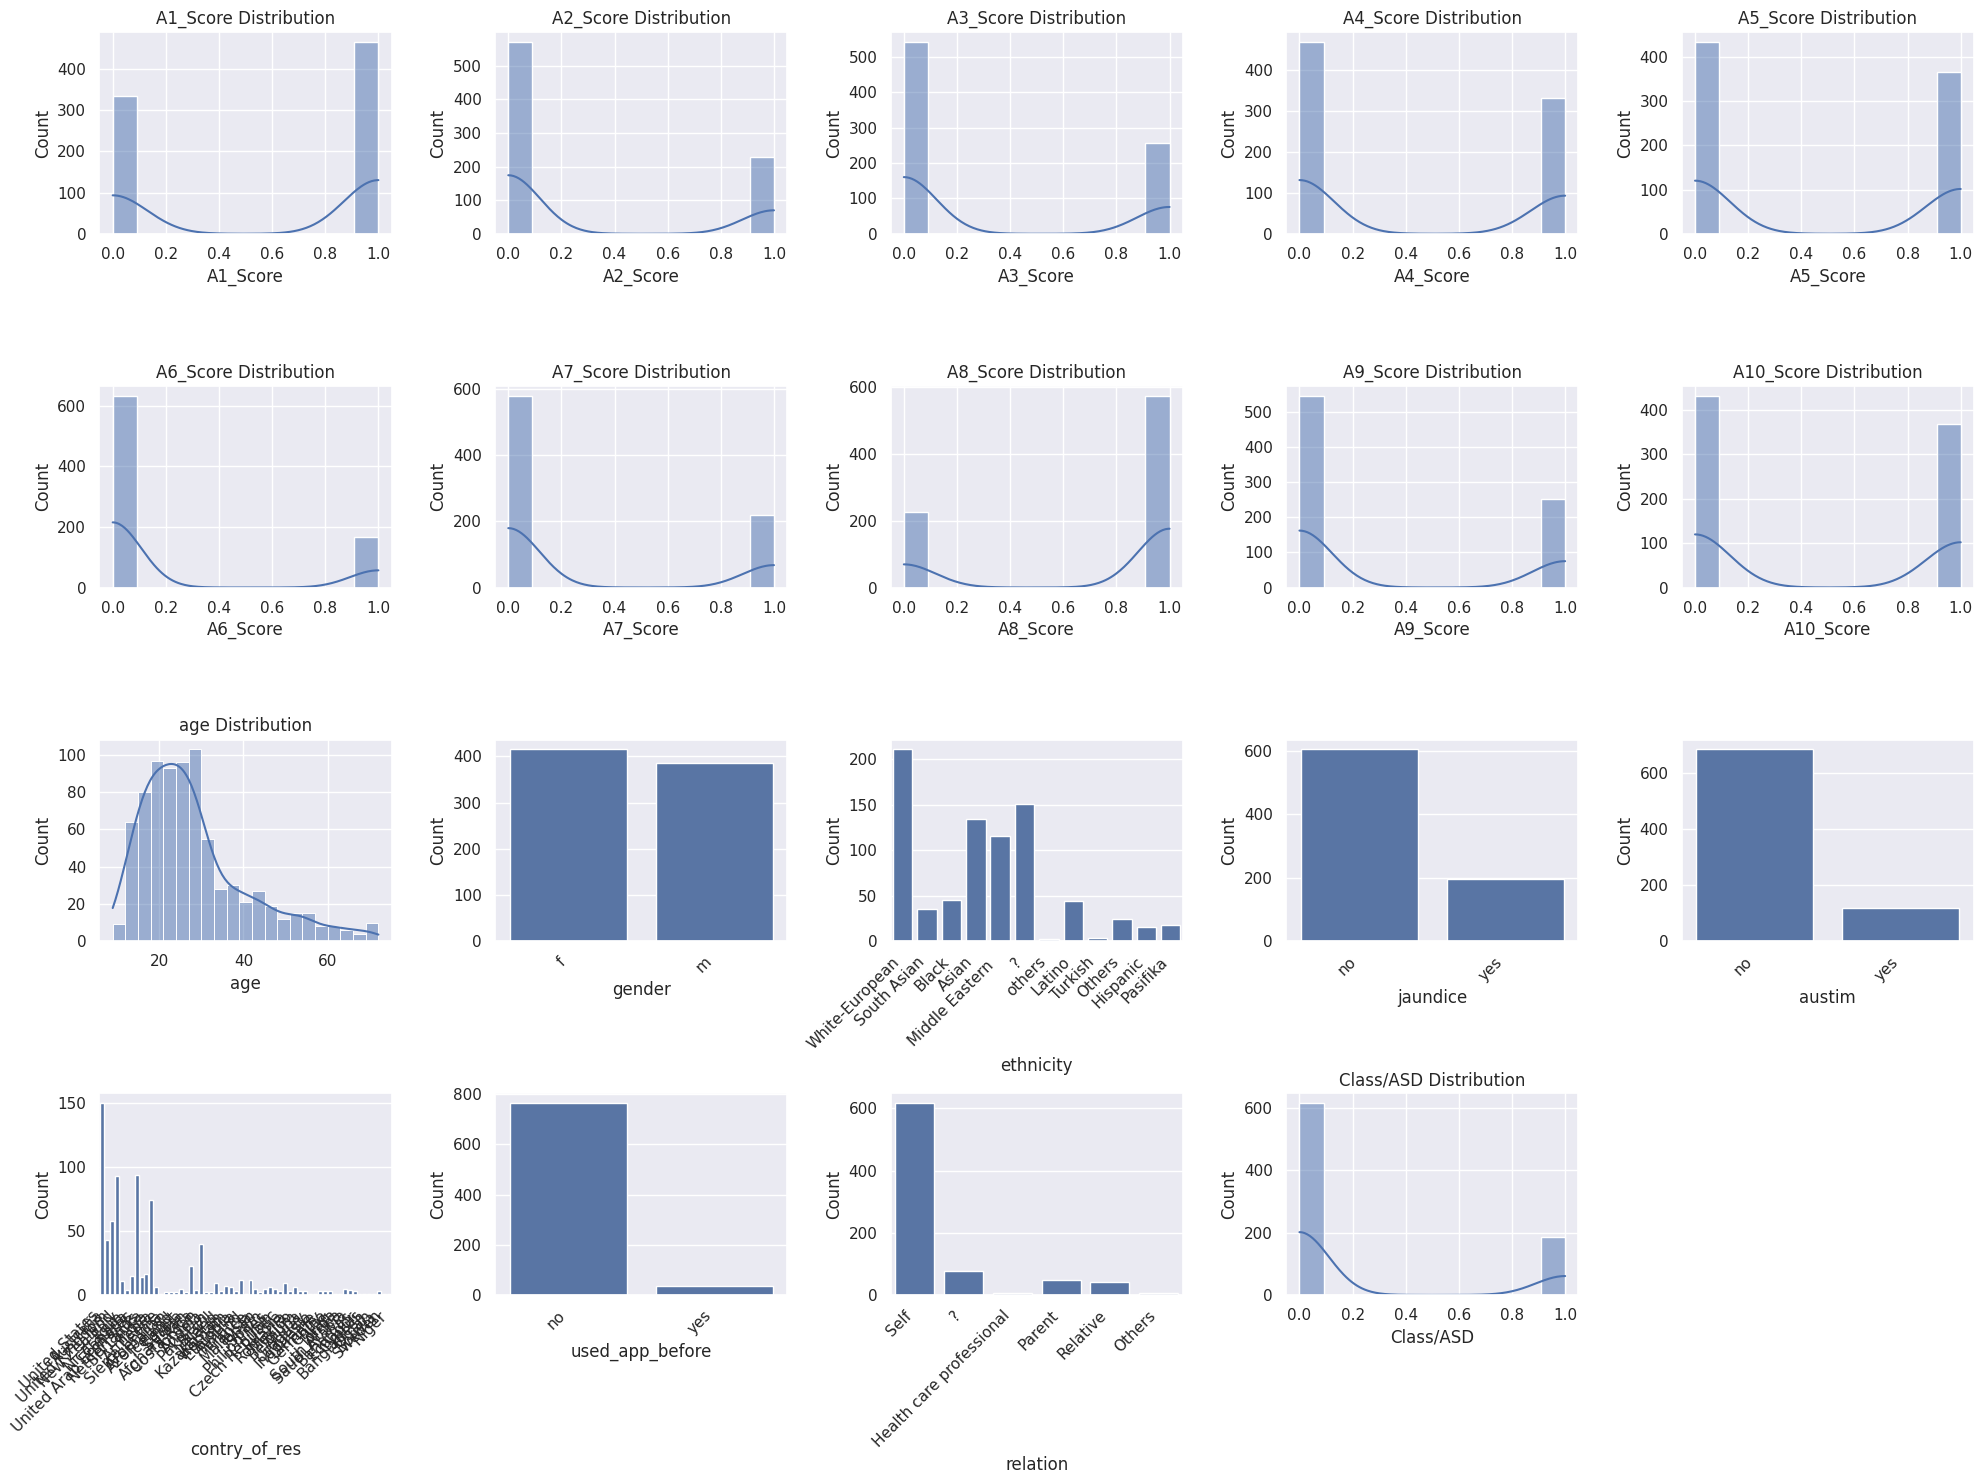

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# plot the distributions of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.4, wspace=0.5):
    sns.set_theme(style="darkgrid")

    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)

    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)

        if dataset.dtypes[column] == object:
            g = sns.countplot(x=dataset[column], ax=ax)
            g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
            plt.tight_layout()
            ax.set_ylabel("Count")

        else:
            sns.histplot(dataset[column], kde=True, ax=ax)
            plt.title(f'{column} Distribution')

plot_distribution(train_df)

Let's look for outliers in the `numerical_columns`
from the plot of `age` we can see there are some outliers in the columns

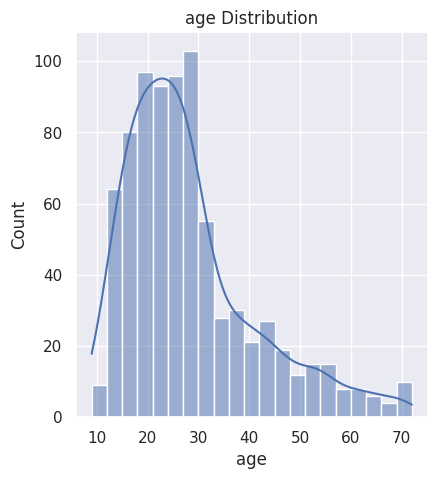

In [ ]:
# let's only plot age distribution

plot_distribution(train_df[numerical_columns], cols=2, width=10, height=5,
                  hspace=0.2, wspace=0.2)

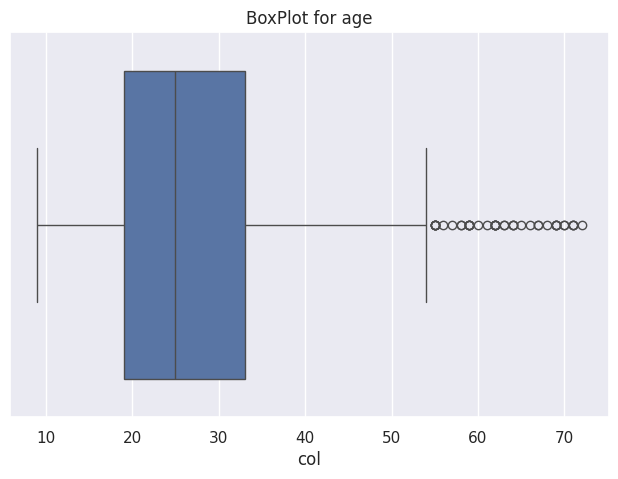

In [ ]:
# box plots for numerical columns

fig = plt.figure(figsize = (17,5))
for i, col in enumerate(numerical_columns):
  plt.subplot(1,2,i+1)
  sns.boxplot(x= train_df[col])
  plt.title(f"BoxPlot for {col}")
  plt.xlabel('col')
plt.show()

#### Counting number of outliers in age column using IQR method
IQR Method

IQR -> Interquartile range

Outliers are the data points falling below `Q1 - 1.5 IQR` or above `Q3 + 1.5 IQR`
where
- Q1 -> 25th percentile
- Q2 -> 75th percentile
- IQR -> Q3-Q1


In [ ]:
# age outliers
Q1 = train_df['age'].quantile(0.25)
Q3 = train_df['age'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
age_outliers = train_df[(train_df['age']< lower) | (train_df['age']> upper)]

len(age_outliers)

43

Plot curves of categorical columns

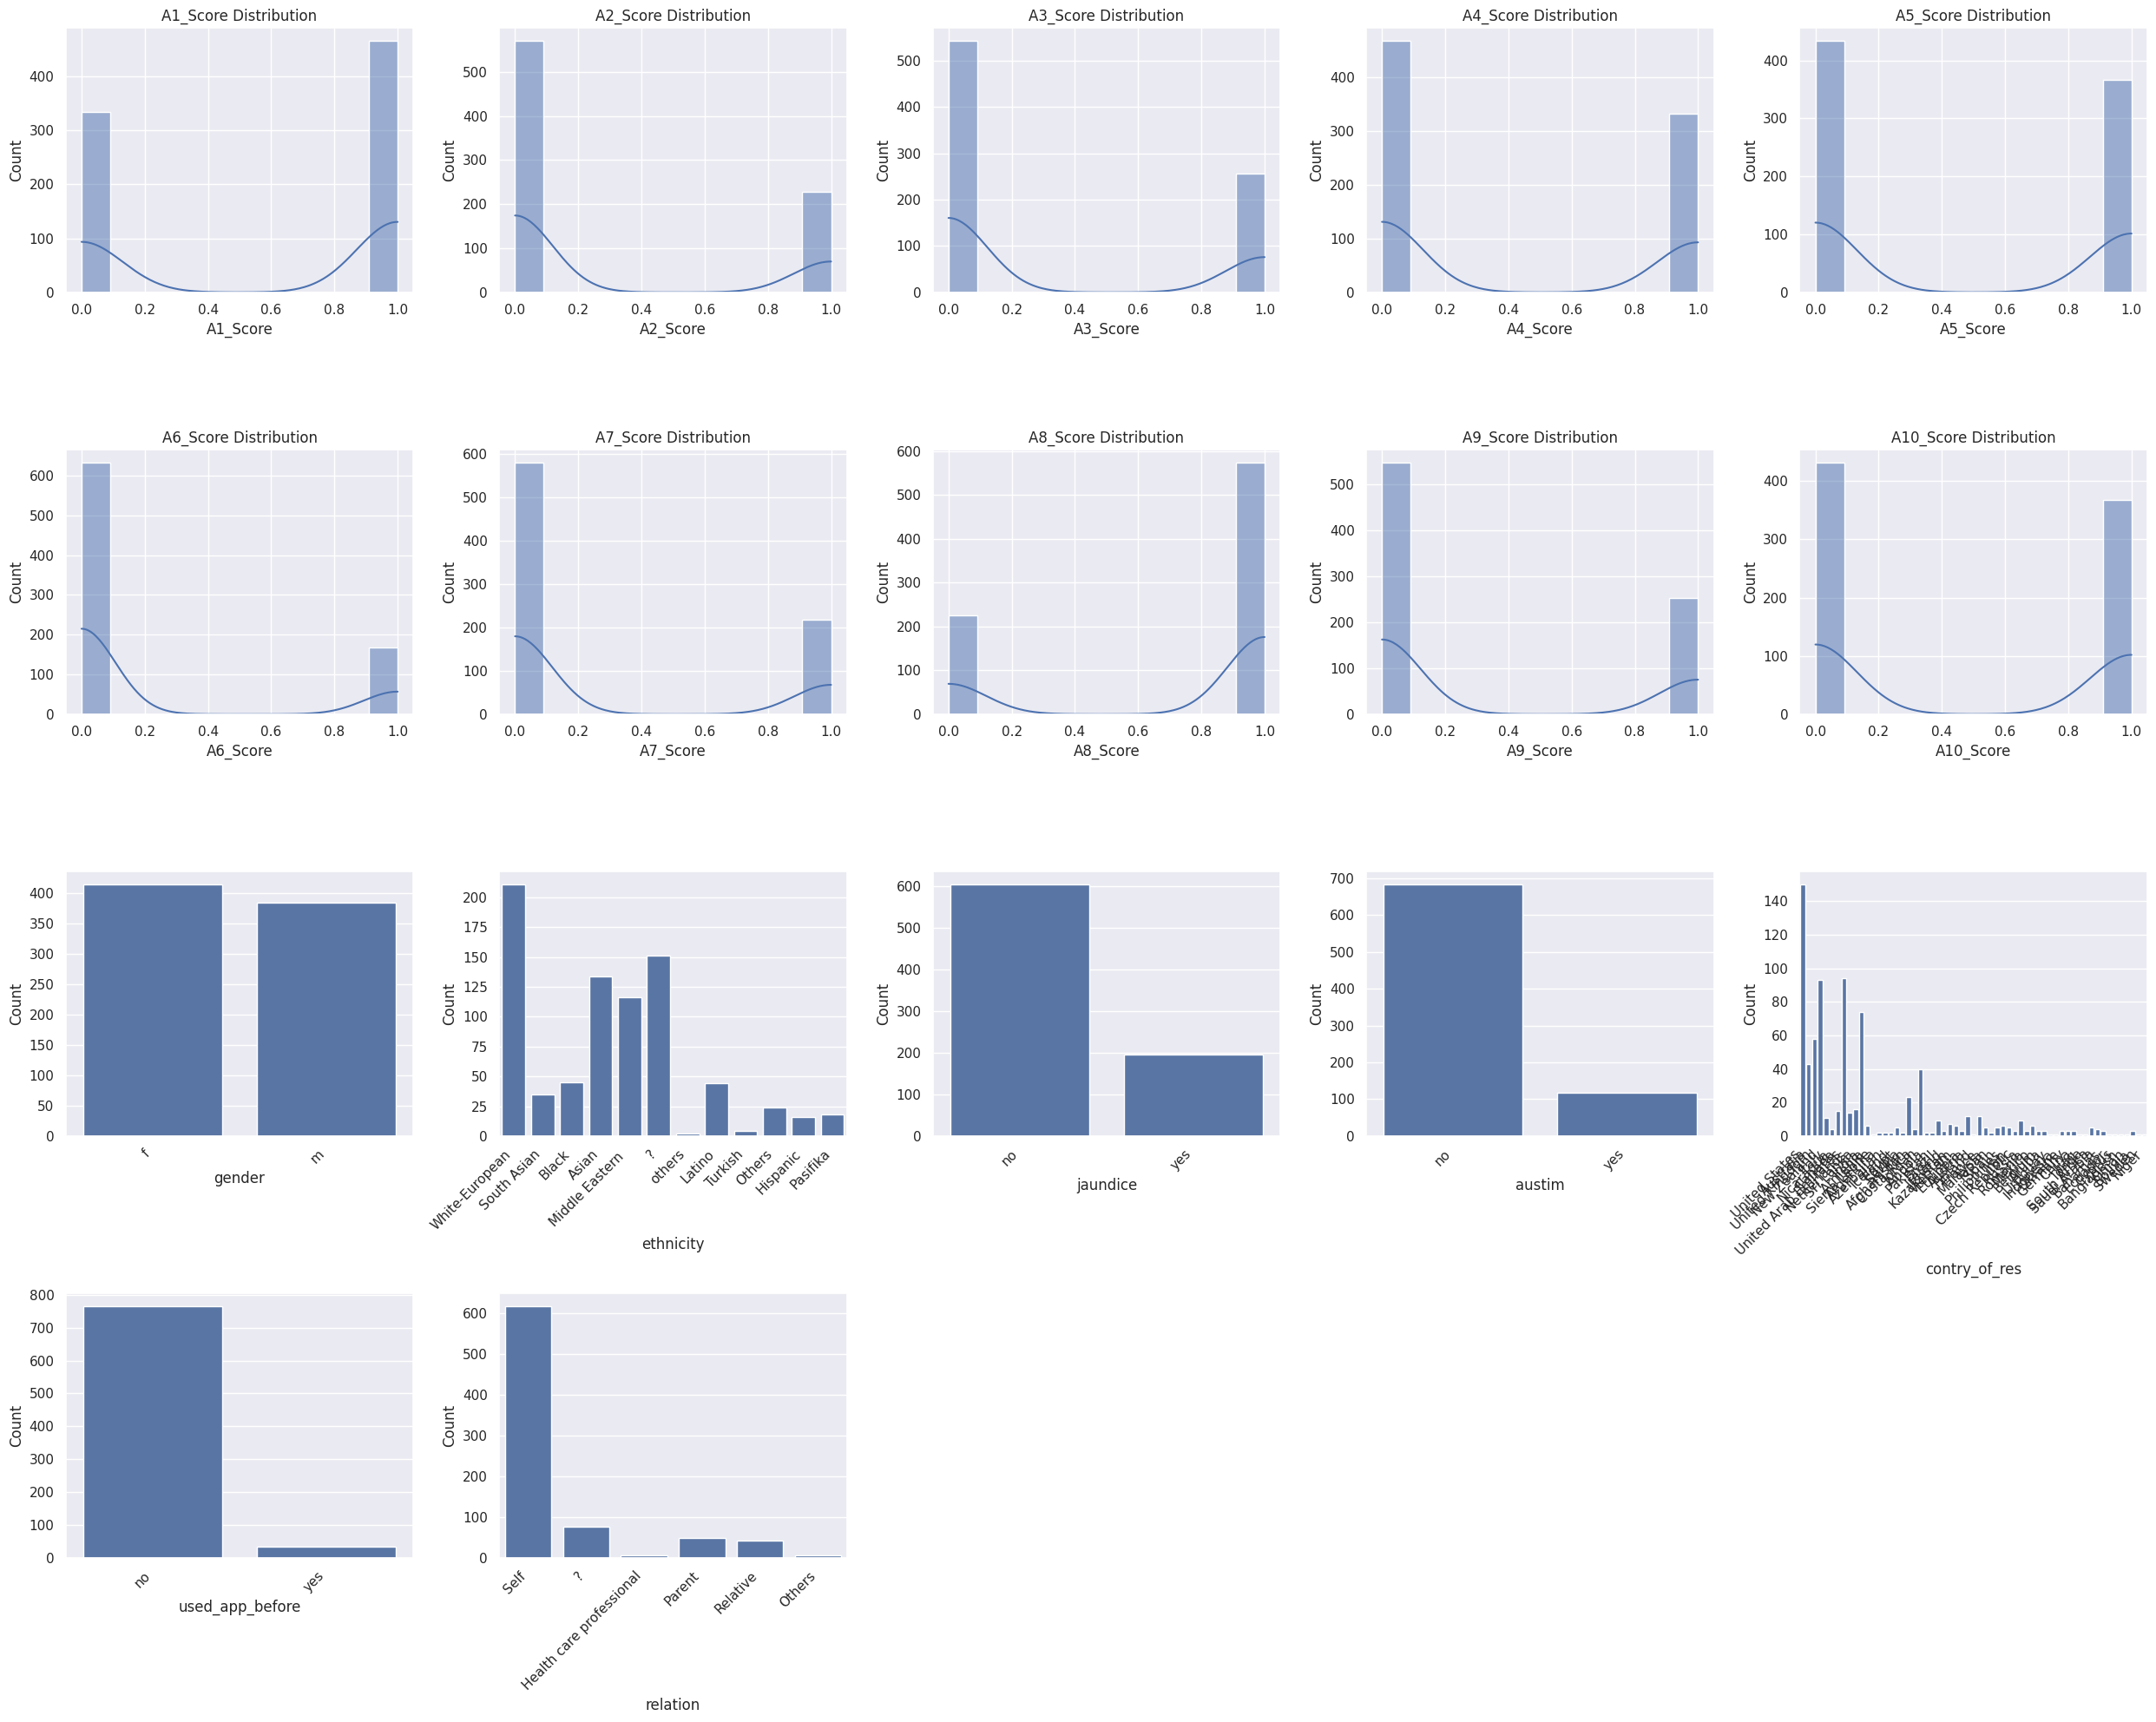

In [ ]:
# let's only plot age distribution

plot_distribution(train_df[categorical_columns], cols=5, width=25, height=20,
                  hspace=0.4, wspace=0.5)

In [ ]:
train_df['ethnicity'].value_counts()

,count
ethnicity,
White-European,211
?,151
Asian,134
Middle Eastern,116
Black,45
Latino,44
South Asian,35
Others,24
Pasifika,18


In [ ]:
train_df['relation'].value_counts()

,count
relation,
Self,617
?,77
Parent,49
Relative,43
Health care professional,7
Others,7


In [ ]:
train_df['relation'].value_counts()

,count
relation,
Self,617
?,77
Parent,49
Relative,43
Health care professional,7
Others,7


#### handling `?`, `others` and `Others` values

In [ ]:
train_df["ethnicity"] = train_df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [ ]:
train_df['ethnicity'].unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', 'Others', 'Latino', 'Turkish', 'Hispanic',
       'Pasifika'], dtype=object)

In [ ]:
train_df['relation'] = train_df['relation'].replace({
    '?': 'Others',
    'Relative': 'Others',
    'Parent': 'Others',
    'Health care professional': 'Others'
})

In [ ]:
train_df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
train_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,Others,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,Others,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,Self,0


#### Bivariate Analysis

Let's analyze by combining some of the features

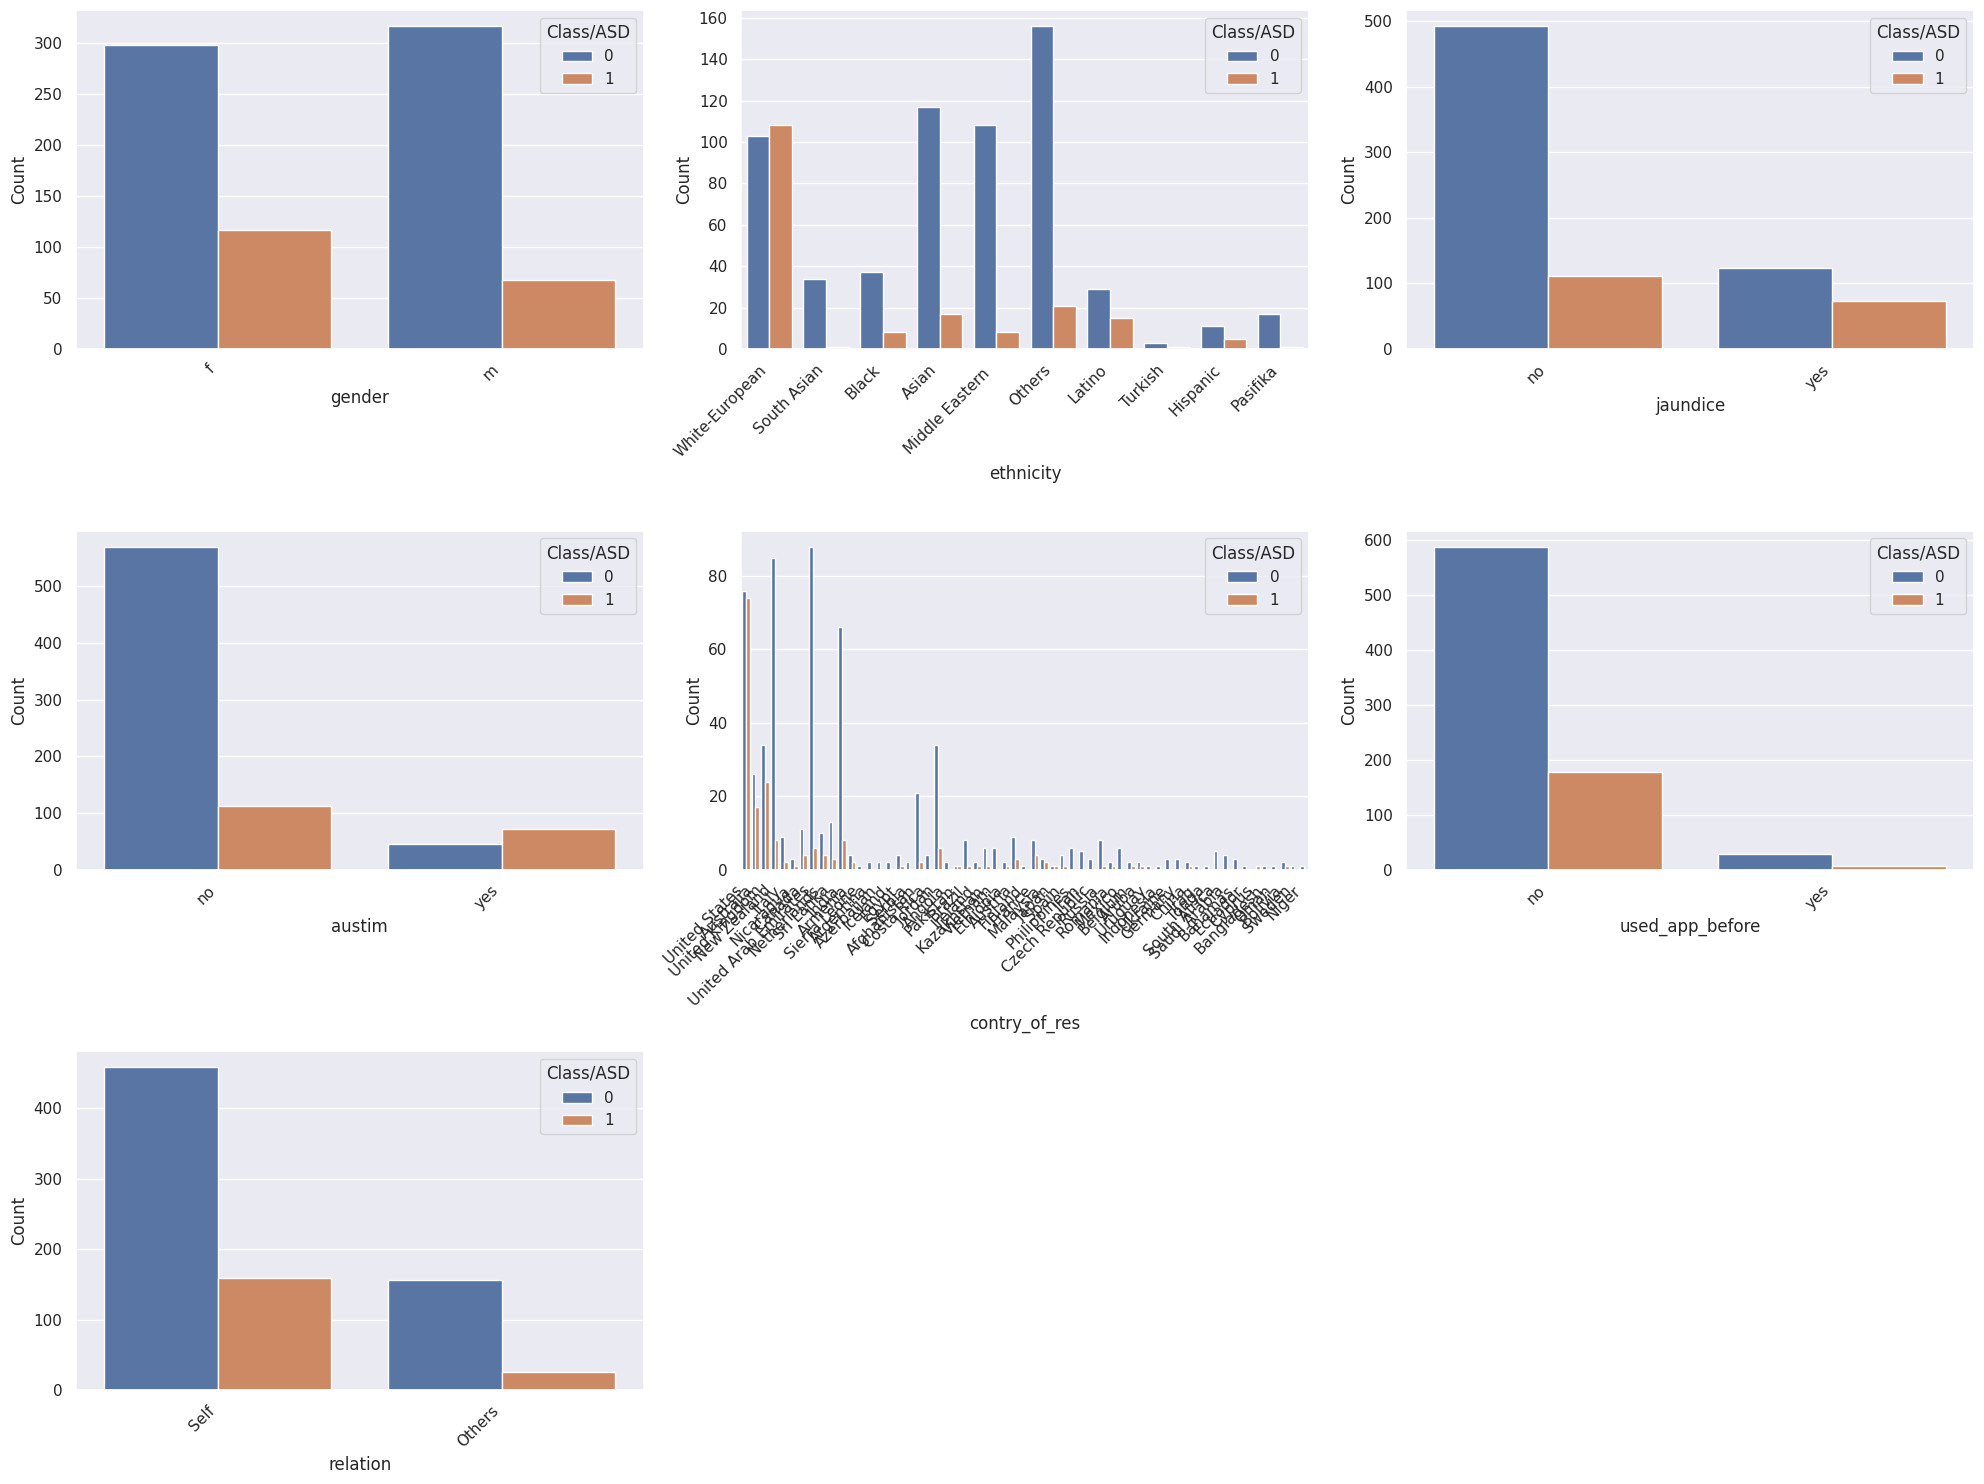

In [ ]:
# Plot a count of the categories from each categorical feature split by our prediction class -> 'Class/ASD'
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15,
                       hspace=0.2, wspace=0.5):
  dataset= dataset.select_dtypes(include = ['object'])
  sns.set_theme(style="darkgrid")

  fig = plt.figure(figsize = (width, height))
  fig.subplots_adjust(wspace=wspace, hspace=hspace)

  rows = math.ceil(float(dataset.shape[1]) / cols)

  for i, column in enumerate(dataset.columns):
      ax = fig.add_subplot(rows, cols, i + 1)

      if dataset.dtypes[column] == object:
          g = sns.countplot(x=dataset[column], hue= hue, ax=ax)
          g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
          plt.tight_layout()
          ax.set_ylabel("Count")

plot_bivariate_bar(train_df, hue= train_df['Class/ASD'], cols=3)

no general conclusion
- family history of `autism` is strongly associated with ASD diagonsis
- more number of white-europeans and asians are diagnosed with ASD

### Encoding -> Label Encoding

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         800 non-null    int64 
 1   A2_Score         800 non-null    int64 
 2   A3_Score         800 non-null    int64 
 3   A4_Score         800 non-null    int64 
 4   A5_Score         800 non-null    int64 
 5   A6_Score         800 non-null    int64 
 6   A7_Score         800 non-null    int64 
 7   A8_Score         800 non-null    int64 
 8   A9_Score         800 non-null    int64 
 9   A10_Score        800 non-null    int64 
 10  age              800 non-null    int64 
 11  gender           800 non-null    object
 12  ethnicity        800 non-null    object
 13  jaundice         800 non-null    object
 14  austim           800 non-null    object
 15  contry_of_res    800 non-null    object
 16  used_app_before  800 non-null    object
 17  relation         800 non-null    ob

In [ ]:
#selecting columns with object dtype
object_col = train_df.select_dtypes(include = ['object']).columns
object_col

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# init encoders dict
encoders = {}

for col in object_col:
  train_df[col] = LabelEncoder().fit_transform(train_df[col])
  # saving the encoder
  encoders[col] = LabelEncoder()

Saving the encoders as a pickle file

In [ ]:
import pickle
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
train_df[object_col].value_counts()

gender  ethnicity  jaundice  austim  contry_of_res  used_app_before  relation
0       9          0         1       56             0                1           15
1       9          1         0       56             0                1           13
        5          0         0       37             0                1           12
0       9          0         0       56             0                1           10
1       0          0         0       54             0                1           10
                                                                                 ..
0       9          1         0       13             0                0            1
        2          1         0       56             0                1            1
        9          1         0       0              0                1            1
        3          0         0       6              0                1            1
        9          1         0       37             0                1            1
Name: count, Length: 486, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

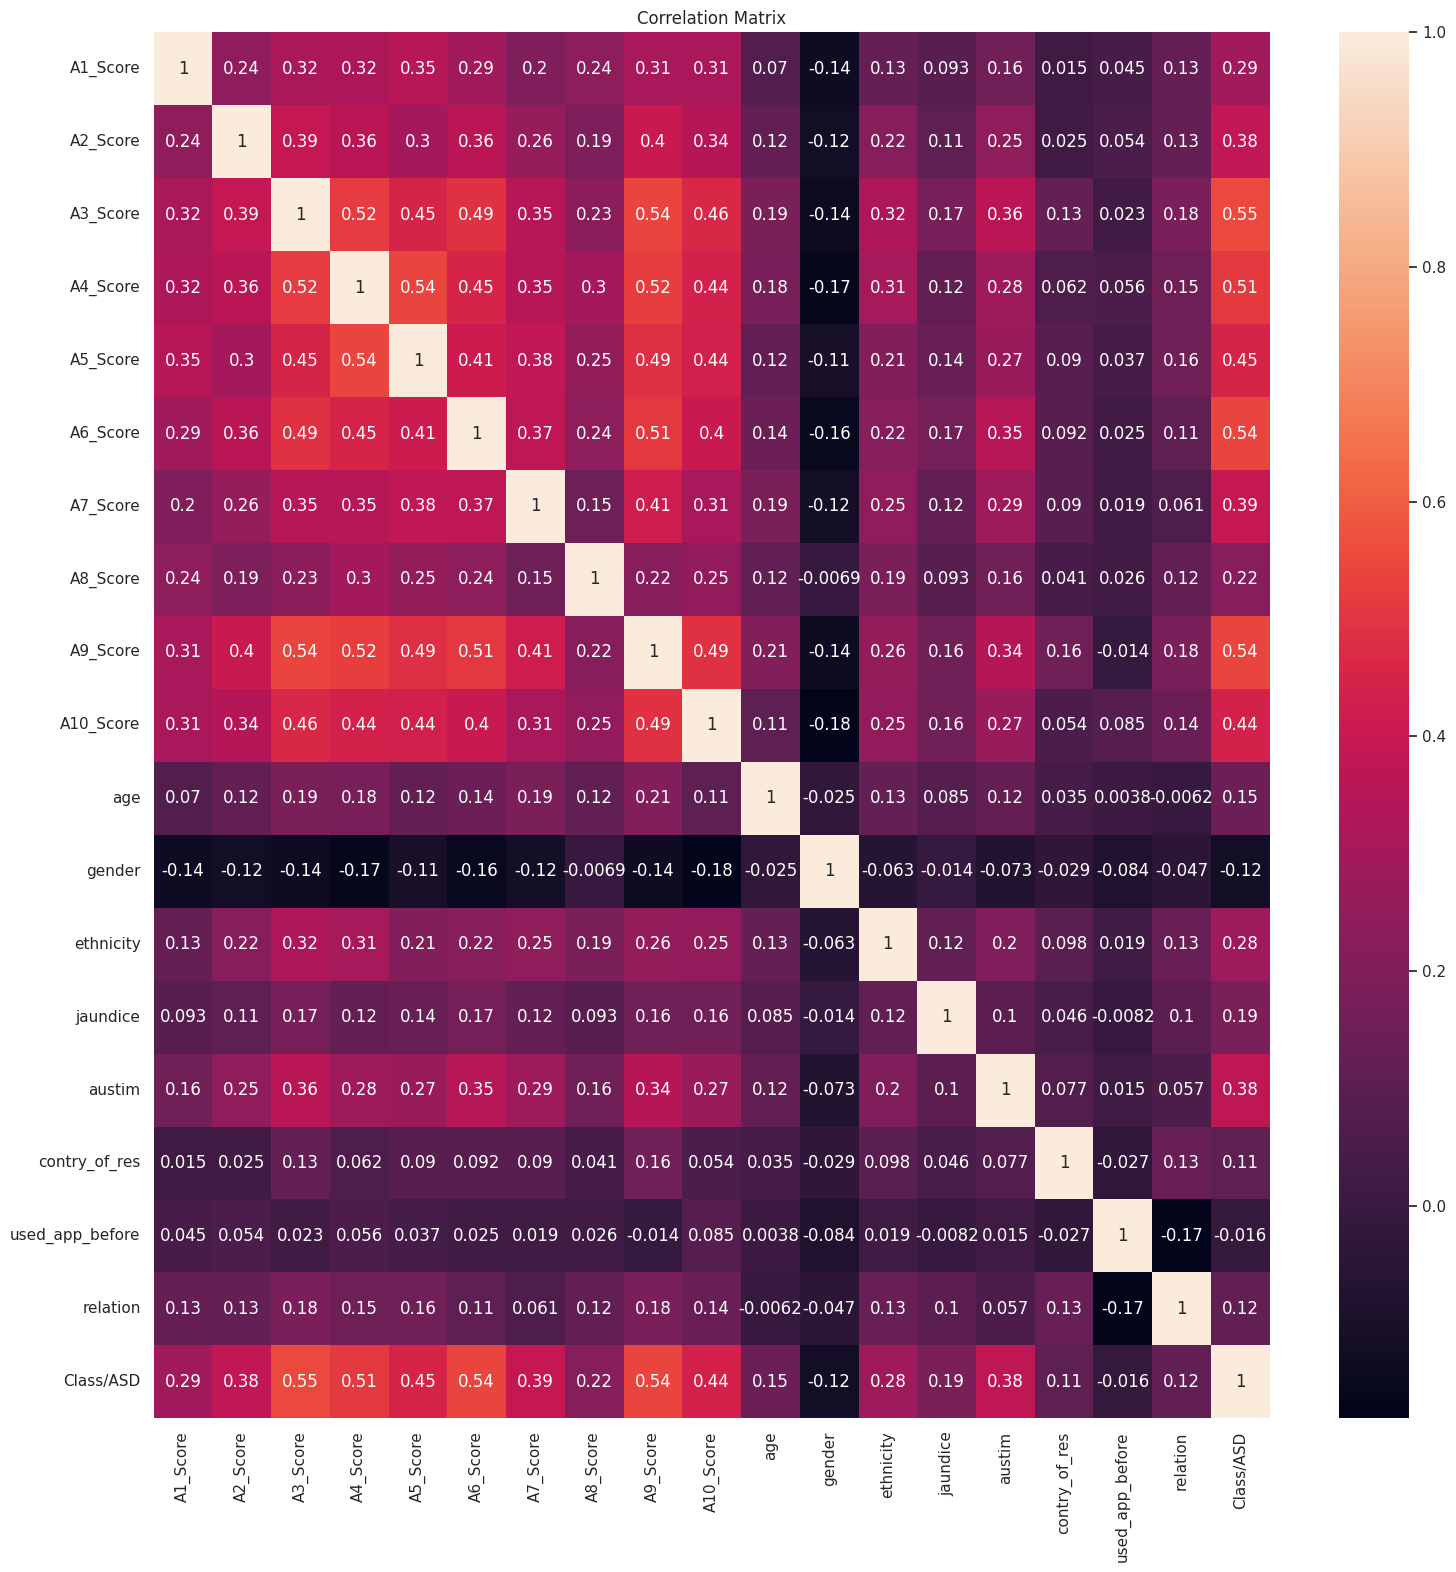

In [ ]:
# correlation matrix
plt.figure(1, figsize = (18,18))
cor = sns.heatmap(train_df.corr(), annot= True)
plt.title('Correlation Matrix')

### Data Preprocessing

Replacing Outliers in `age` column with their median value

In [ ]:
# let's write a function of this
def replace_outliers(dataset, columns):
  for i in range(len(columns)):
    Q1 = dataset[columns[i]].quantile(0.25)
    Q3 = dataset[columns[i]].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    median = dataset[columns[i]].median()

    dataset[columns[i]] = dataset[columns[i]].apply(lambda x: median if x< lower_bound or x > upper_bound else x)
  return dataset

In [ ]:
replace_outliers(dataset = train_df, columns= numerical_columns)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.0,0,9,0,0,56,0,1,0
1,0,0,0,0,0,0,0,0,0,1,13.0,0,7,0,0,5,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.0,0,9,0,0,55,0,1,1
3,0,0,0,1,0,0,0,0,0,0,25.0,0,7,0,0,37,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.0,1,1,0,1,30,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42.0,0,9,0,1,56,0,1,1
796,1,1,0,0,1,0,0,0,1,1,17.0,0,0,0,0,37,0,1,0
797,0,0,0,0,0,0,1,0,1,1,18.0,1,9,1,0,32,0,1,1
798,1,1,1,1,1,1,0,1,1,1,19.0,0,4,0,1,56,0,0,0


### Train and Validation set Split

In [ ]:
# target(y) and labels(X)
y = train_df['Class/ASD']
X = train_df.drop(columns=['Class/ASD'])

In [ ]:
print(f'Labels:\n {X.head()} \nShape {X.shape}')
print('---'*30)
print(f'Target:\n {y.head()} \nShape {y.shape}')

Labels:
    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         1         1         1         0   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         0   
3         0         0         0         1         0         0         0   
4         0         0         0         0         1         0         0   

   A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  austim  \
0         1         1          1  18.0       0          9         0       0   
1         0         0          1  13.0       0          7         0       0   
2         0         1          1  14.0       0          9         0       0   
3         0         0          0  25.0       0          7         0       0   
4         0         1          1  14.0       1          1         0       1   

   contry_of_res  used_app_before  relation  
0             56   

In [ ]:
# splitting the dataset into trained and valid split

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=69)

print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_valid Shape: {X_valid.shape}')
print(f'y_valid Shape: {y_valid.shape}')

X_train Shape: (640, 18)
y_train Shape: (640,)
X_valid Shape: (160, 18)
y_valid Shape: (160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,488
1,152


In [ ]:
y_valid.value_counts()

,count
Class/ASD,
0,127
1,33


Imbalance Distribution
-> can be solved to oversample the minority class here `1`

Sampling -> SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=69)

In [ ]:
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

print(f'Shape of Sampled X_train: {X_train_sampled.shape}')
print(f'Shape of Sampled y_train: {y_train_sampled.shape}')

Shape of Sampled X_train: (976, 18)
Shape of Sampled y_train: (976,)


In [ ]:
y_train_sampled.value_counts()

,count
Class/ASD,
0,488
1,488


Doing Hyperparameter tuning using Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


### Model Training and HyperParameters Tuning

In [ ]:
# training a Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# objective fun definition
def objective(trial):

  # suggest for some hyperparameters values
  n_estimators = trial.suggest_int('n_estimators',50,500,25)
  max_depth = trial.suggest_int('max_depth',10,30)
  min_samples_split = trial.suggest_int('min_samples_split', 2,10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
  bootstrap = trial.suggest_categorical('bootstrap', [True, False])

  # initilize model
  model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split= min_samples_split,
                                   min_samples_leaf= min_samples_leaf,
                                   bootstrap= bootstrap,
                                   random_state = 36)

  # perform 5-fold cross validation and calculate mean accuracy
  score = cross_val_score(model, X_train_sampled, y_train_sampled, cv=3, scoring='accuracy').mean()

  return score

In [ ]:
import optuna
# create a study object
study = optuna.create_study(direction= 'maximize', sampler= optuna.samplers.TPESampler())

# optimize the objective func
study.optimize(objective, n_trials = 100)

[I 2024-12-26 20:38:42,043] A new study created in memory with name: no-name-e9a7ea0f-b24f-4c8f-bd19-0c05ae6f1110
[I 2024-12-26 20:38:43,417] Trial 0 finished with value: 0.8555198993235803 and parameters: {'n_estimators': 175, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.8555198993235803.
[I 2024-12-26 20:38:45,685] Trial 1 finished with value: 0.8514236274972471 and parameters: {'n_estimators': 250, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.8555198993235803.
[I 2024-12-26 20:38:54,917] Trial 2 finished with value: 0.8401541607676576 and parameters: {'n_estimators': 500, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.8555198993235803.
[I 2024-12-26 20:39:02,202] Trial 3 finished with value: 0.8555198993235803 and parameters: {'n_estimators': 475, 'max_depth': 26, 'min_samples_spli

In [ ]:
# best result
print(f'Best accuracy: {study.best_value}')
print(f'Best hyperparameters: {study.best_params}')

Best accuracy: 0.8965298096586439
Best hyperparameters: {'n_estimators': 300, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


In [ ]:
from sklearn.metrics import accuracy_score

# train the model with best params from optuna
best_model = RandomForestClassifier(**study.best_params, random_state=36)

# fit the model to the train set
best_model.fit(X_train_sampled, y_train_sampled)

# make predictions on valid set
y_pred = best_model.predict(X_valid)

# accuracy
valid_acc = accuracy_score(y_valid, y_pred)

print(f'Validation Accuracy with best hyperparameters: {valid_acc}')

Validation Accuracy with best hyperparameters: 0.8625


In [ ]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [ ]:
import pickle
loaded_model = pickle.load(open('best_model.pkl', 'rb'))


In [ ]:
# loaded_encoders = pickle.load(open('encoders.pkl', 'rb'))

In [ ]:
#loaded_encoders

In [ ]:
# for col in loaded_encoders:
#   col = loaded_encoders[col]

In [ ]:
y_pred = loaded_model.predict(X_valid)
valid_acc = accuracy_score(y_valid, y_pred)

In [ ]:
valid_acc

0.8625